<a href="https://colab.research.google.com/github/sruthyav10/Mini-Project/blob/master/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1- Gather Data
!pip install bing-image-downloader

In [2]:
!ls

drive  sample_data


In [3]:
cd /content/drive/My Drive/Minor Project

/content/drive/My Drive/Minor Project


In [4]:
!ls

trial.ipynb


In [5]:
!mkdir images

In [6]:
cd images

/content/drive/My Drive/Minor Project/images


In [7]:
from bing_image_downloader import downloader
downloader.download("elephant animal",limit=5,output_dir='images')



[!!]Indexing page: 1

[%] Indexed 5 Images on Page 1.


[%] Downloading Image #1 from https://s27957.pcdn.co/wp-content/uploads/2017/08/responsible-animal-activities-south-africa-elephants.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://3.bp.blogspot.com/-UZlV_t21oQg/TxecmbGk8tI/AAAAAAAAC4g/C8Fe9XqL6uo/s1600/baby+african+elephants+playing+beautiful+dangerous+african+elephant+family.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/c6/c6/5b/c6c65b78754476da84f6648ab49cdb0f.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://upload.wikimedia.org/wikipedia/commons/a/a5/Elephant_in_Tanzania_3306_Nevit.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/Uv_MZlb_DCM/maxresdefault.jpg
[%] File Downloaded !



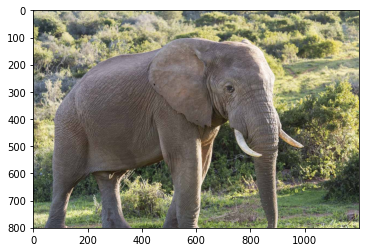

In [8]:
path = '/content/drive/My Drive/Minor Project/images/images/elephant animal/Image_1.jpg'
import cv2
import matplotlib.pyplot as plt

i=cv2.imread(path)
i=cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.imshow(i)

In [9]:
from bing_image_downloader import downloader
downloader.download("leopard animal",limit =5,output_dir ='images')



[!!]Indexing page: 1

[%] Indexed 5 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-T3oJ-jnj4BI/UZc_j7UVZ2I/AAAAAAAAAVA/N-srNcW9u-g/s1600/SriLankan-Leopard.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-y6P3-RXTyQk/UZc_nzqCDCI/AAAAAAAAAVI/D2ZrEXfXsLY/s1600/Persian-Leopard.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/e8/b4/0a/e8b40acf99b44a298f03f60c562d661a.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://3.bp.blogspot.com/-ZOum1YUGpIs/T5pEkc3NY2I/AAAAAAAAA9w/c5FC-ODeB98/s1600/dangerous+animal+attacks+news+leopards-and-cheetahs.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/e5/fb/a1/e5fba125c32f20a45b9d5e00937323d1.jpg
[%] File Downloaded !



In [10]:
import os
import cv2
path = '/content/drive/My Drive/Minor Project/images/images/elephant animal'
for filename in os.listdir(path):
  i=cv2.imread(os.path.join(path,filename))
  print(i.shape)

(801, 1200, 3)
(750, 1000, 3)
(2048, 1365, 3)
(3648, 2736, 3)
(720, 1280, 3)


In [11]:
import os
from skimage.io import imread
from skimage.transform import resize

In [15]:
#Flattening and scaling down the value
#Step 2- Data Preprocessing
target=[]  #this is the list of target
flat_data=[] #image pixel is flatten style
images=[]
path= '/content/drive/My Drive/Minor Project/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:  
    category=dirpath.split('/')[-1]
    target.append(category)
    img=imread(f'{path}{category}/{filename}')
    img_resized=resize(img,(50,50))#scaling down
    flat_data.append(img_resized.flatten())#flattening
    images.append(img_resized)

flat_data = np.array(flat_data)
target=np.array(target)
images=np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

(10, 7500)
(10,)
(10, 50, 50, 3)


In [13]:
import numpy as np

a=np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [14]:
a.flatten()

array([1, 2, 3, 4])

In [81]:
#creating a dataframe
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [82]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.787275,0.780392,0.676431,0.784353,0.772549,0.674510,0.739294,0.743216,0.649059,0.662824,0.675549,0.591196,0.633294,0.646980,0.569549,0.688196,0.692118,0.612725,0.607843,0.619608,0.595078,0.733333,0.719608,0.645098,0.819608,0.796078,0.654902,0.798039,0.774510,0.643137,0.650941,0.665667,0.553902,0.718608,0.715686,0.601961,0.750980,0.735294,0.621569,0.709725,...,0.560784,0.598039,0.433333,0.517647,0.598000,0.374549,0.552941,0.619608,0.386314,0.563667,0.613686,0.399961,0.570471,0.603843,0.417608,0.520529,0.554863,0.415686,0.558745,0.597961,0.426412,0.647941,0.683235,0.493118,0.688157,0.723451,0.511725,0.684314,0.725490,0.495118,0.670588,0.701961,0.526451,0.700000,0.728412,0.515647,0.725569,0.747098,0.514765,elephant animal
1,0.047059,0.113725,0.109804,0.043137,0.105882,0.109804,0.043137,0.121569,0.121569,0.050980,0.139216,0.143137,0.054902,0.149020,0.158824,0.078431,0.190196,0.209804,0.074510,0.160784,0.178431,0.100000,0.190196,0.182353,0.127451,0.235294,0.223529,0.121569,0.241176,0.239216,0.152941,0.266667,0.262745,0.180392,0.292157,0.278431,0.203922,0.321569,0.305882,0.223529,...,0.458824,0.574510,0.427451,0.450980,0.535294,0.421569,0.468627,0.498039,0.380392,0.505882,0.533333,0.482353,0.447059,0.503922,0.441176,0.454902,0.494118,0.370588,0.454902,0.488235,0.401961,0.380392,0.525490,0.333333,0.319608,0.449020,0.274510,0.405882,0.409804,0.303922,0.386275,0.401961,0.300000,0.305882,0.341176,0.278431,0.274510,0.337255,0.268627,elephant animal
2,0.745686,0.620208,0.306392,0.862745,0.737212,0.390000,0.820647,0.676529,0.407843,0.772627,0.607843,0.403922,0.767282,0.592157,0.388235,0.741176,0.564706,0.349020,0.768431,0.596078,0.364514,0.771588,0.607843,0.376471,0.760784,0.607843,0.376471,0.698627,0.580980,0.302549,0.615686,0.541176,0.243137,0.676275,0.597765,0.235294,0.725412,0.619529,0.274490,0.698039,...,0.662725,0.532353,0.329412,0.619608,0.490196,0.311533,0.592733,0.494706,0.301961,0.525424,0.462678,0.290129,0.603878,0.495847,0.325490,0.700980,0.564706,0.387255,0.698039,0.568627,0.407843,0.649608,0.529384,0.382941,0.564706,0.446980,0.298039,0.560980,0.450980,0.309804,0.477451,0.388216,0.242157,0.457016,0.372471,0.219529,0.478431,0.392078,0.235282,elephant animal
3,0.725490,0.752941,0.725490,0.729412,0.752941,0.729412,0.733333,0.756863,0.737255,0.737255,0.756863,0.741176,0.741176,0.760784,0.745098,0.742944,0.764706,0.749020,0.745098,0.764706,0.752941,0.749020,0.768627,0.760784,0.752941,0.768627,0.764706,0.756863,0.772549,0.768627,0.760711,0.772549,0.768627,0.760784,0.776471,0.772549,0.760784,0.780392,0.776471,0.764706,...,0.752941,0.662745,0.458824,0.752941,0.661882,0.458824,0.733333,0.639216,0.443137,0.729412,0.635294,0.435294,0.725490,0.631373,0.431373,0.721569,0.623529,0.419608,0.717647,0.615686,0.414916,0.717605,0.617454,0.411765,0.709804,0.615686,0.407843,0.729412,0.631373,0.419608,0.709804,0.615631,0.407843,0.701961,0.607765,0.400000,0.689580,0.592157,0.388235,elephant animal
4,0.629020,0.647059,0.697216,0.631373,0.657647,0.705882,0.622353,0.653725,0.710980,0.598824,0.627451,0.698039,0.619608,0.643137,0.705882,0.631373,0.654902,0.709804,0.615686,0.647059,0.717647,0.579804,0.631373,0.714902,0.563529,0.630196,0.721569,0.558431,0.631373,0.732157,0.551765,0.627451,0.733333,0.568627,0.631373,0.717647,0.568627,0.631373,0.709804,0.552941,...,0.704706,0.588235,0.392157,0.705882,0.592157,0.400000,0.713725,0.600000,0.400824,0.709804,0.592157,0.392157,0.700784,0.588235,0.396078,0.713725,0.592745,0.400000,0.709804,0.592157,0.398824,0.707804,0.594902,0.401922,0.713725,0.600000,0.402745,0.713725,0.596078,0.396078,0.704706,0.588235,0.398824,0.710078,0.596078,0.400000,0.709804,0.596078,0.396902,elephant animal


In [93]:
X = df.drop('Target', axis=1)
y = df['Target']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [95]:
#training the data
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
#making predictions
y_pred = svclassifier.predict(X_test)

In [97]:
#Step 4-evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1 0]
 [0 2]]
                 precision    recall  f1-score   support

elephant animal       1.00      1.00      1.00         1
 leopard animal       1.00      1.00      1.00         2

       accuracy                           1.00         3
      macro avg       1.00      1.00      1.00         3
   weighted avg       1.00      1.00      1.00         3



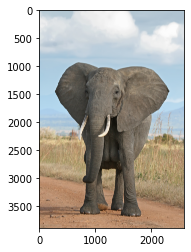

In [115]:
#Step 5- predicting for a new imgage
from skimage.io import imread
import matplotlib.pyplot as plt
i=imread('https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg')
plt.imshow(i)